# Kapitel 3 – Lage- und Streuungsmaße

> **Leitfrage:** Wie fassen wir Daten in wenigen Kennzahlen zusammen, ohne wichtige Informationen zu verlieren?  
> **Lernziele:** Du kannst Lagemaße und Streuungsmaße berechnen, interpretieren und gezielt auswählen.

---

Dieses Notebook ist so aufgebaut, dass du es **direkt im Unterricht** nutzen kannst:

1. Kurze Motivation („Warum Kennzahlen?“)  
2. Lagemaße (arithmetisches Mittel, Median, Modus, Quantile)  
3. Streuungsmaße (Spannweite, Varianz/Standardabweichung, Interquartilsabstand)  
4. **Kastendiagramm (Boxplot)** als kombinierte Darstellung  
5. Mini-Beispiel + Interpretationshilfe (Schiefe)



In [1]:
# Grundlagen: Imports
import math
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

## Warum Kennzahlen?

Ein Datensatz kann hunderte oder tausende Werte enthalten. **Kennzahlen** reduzieren diese Information auf wenige Zahlen.

Das ist nützlich für:

- Vergleiche zwischen Gruppen (z. B. zwei Produktionslinien)
- Berichte und Dashboards
- schnelle Plausibilitätschecks

**Aber:** Reduktion bedeutet Informationsverlust. Deshalb nutzt man Kennzahlen **kombiniert**  
(z. B. *Mittelwert + Standardabweichung + Kastendiagramm*).


## Beispiel-Datensatz

Wir starten mit einem kleinen Datensatz, der **rechtsschief** ist (einige sehr große Werte).  
Das ist typisch z. B. bei *Einkommen*, *Lieferzeiten* oder *Fehlerkosten*.


In [2]:
# Beispiel: rechtsschiefer Datensatz (z. B. Einkommen in Tsd. €)
x = np.array([32, 34, 35, 36, 36, 37, 38, 39, 41, 42, 45, 48, 55, 60, 120], dtype=float)

x

array([ 32.,  34.,  35.,  36.,  36.,  37.,  38.,  39.,  41.,  42.,  45.,
        48.,  55.,  60., 120.])

## Lagemaße

### Arithmetisches Mittel

$$
\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_i
$$

Interpretation: „Durchschnitt“ der Werte.

**Eigenschaften:**
- nutzt alle Daten
- gut bei symmetrischen Verteilungen
- empfindlich gegenüber Ausreißern


In [3]:
def arithmetisches_mittel(a):
    a = np.asarray(a, dtype=float)
    return float(np.mean(a))

arithmetisches_mittel(x)

46.53333333333333

### Median

Der Median ist der „mittlere“ Wert der sortierten Daten.

- ungerades \(n\): Wert an Position \(\frac{n+1}{2}\)
- gerades \(n\): Mittel der beiden mittleren Werte

**Vorteil:** robust gegen Ausreißer.  
**Interpretation:** 50 % der Werte liegen kleiner oder gleich dem Median.


In [4]:
def median(a):
    a = np.asarray(a, dtype=float)
    return float(np.median(a))

median(x)

39.0

### Modus

Der Modus ist der **häufigste** Wert.

- Für **nominale** Daten ist der Modus oft das einzige sinnvolle Lagemaß.
- Bei metrischen Daten kann es mehrere Modi geben (mehrgipflige Verteilung).


In [5]:
def modi(a):
    # gibt alle Modi zurück (kann mehrere geben)
    a_list = list(a)
    c = Counter(a_list)
    if not c:
        return []
    max_count = max(c.values())
    return sorted([val for val, cnt in c.items() if cnt == max_count]), max_count

modi(x)

([np.float64(36.0)], 2)

### Quantile (Quartile)

Quantile teilen die Daten nach Anteilen. Wichtige Spezialfälle:

- $Q_1$: 25%-Quantil
- $Q_2$: Median (50%)
- $Q_3$: 75%-Quantil

Interpretation:  
25 % der Daten liegen kleiner oder gleich \(Q_1\), 75 % kleiner oder gleich \(Q_3\).


In [6]:
def quartile(a):
    a = np.asarray(a, dtype=float)
    q1 = float(np.quantile(a, 0.25))
    q2 = float(np.quantile(a, 0.50))
    q3 = float(np.quantile(a, 0.75))
    return q1, q2, q3

q1, q2, q3 = quartile(x)
q1, q2, q3

(36.0, 39.0, 46.5)

## Streuungsmaße

### Spannweite

$
R = x_{\max}-x_{\min}
$

Einfach, aber stark ausreißerempfindlich und nutzt nur zwei Werte.


In [7]:
def spannweite(a):
    a = np.asarray(a, dtype=float)
    return float(np.max(a) - np.min(a))

spannweite(x)

88.0

### Varianz und Standardabweichung

Grundidee: Streuung = Abweichung vom Mittelwert.

$
s^2=\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2,\qquad
s=\sqrt{s^2}
$

Für **Stichproben** in der Induktion nutzt man häufig:

\[
S^2=\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2
\]

Das \(n-1\) korrigiert die systematische Unterschätzung der Varianz bei Stichproben (Erwartungstreue).

**Interpretation der Standardabweichung:** typische Abweichung vom Mittelwert (in Originaleinheit).


In [8]:
def varianz_pop(a):
    # s^2 (Division durch n)
    a = np.asarray(a, dtype=float)
    return float(np.mean((a - np.mean(a))**2))

def std_pop(a):
    return float(math.sqrt(varianz_pop(a)))

def varianz_stichprobe(a):
    # S^2 (Division durch n-1)
    a = np.asarray(a, dtype=float)
    n = a.size
    if n < 2:
        return float("nan")
    return float(np.sum((a - np.mean(a))**2) / (n - 1))

def std_stichprobe(a):
    return float(math.sqrt(varianz_stichprobe(a)))

arith_m = arithmetisches_mittel(x)
(varianz_pop(x), std_pop(x), varianz_stichprobe(x), std_stichprobe(x))

(443.3155555555556, 21.05506009384812, 474.9809523809524, 21.794057730972273)

### Interquartilsabstand (IQR)

$
\mathrm{IQR}=Q_3-Q_1
$

Robust gegen Ausreißer, betrachtet die **mittleren 50 %** der Daten.


In [9]:
def iqr(a):
    q1, _, q3 = quartile(a)
    return float(q3 - q1)

iqr(x)

10.5

## Kastendiagramm (Boxplot)

Ein Kastendiagramm zeigt:

- **Box:** von \(Q_1\) bis \(Q_3\)
- **Median:** Linie in der Box
- **Whisker:** bis zu „typischen“ Grenzen
- **Ausreißer:** Punkte außerhalb

**1,5·IQR-Regel (häufig):**

- untere Grenze: $Q_1-1.5\cdot \mathrm{IQR}$
- obere Grenze: $Q_3+1.5\cdot \mathrm{IQR}$


In [10]:
def iqr_grenzen(a, faktor=1.5):
    q1, _, q3 = quartile(a)
    I = q3 - q1
    unten = q1 - faktor * I
    oben  = q3 + faktor * I
    return float(unten), float(oben)

unten, oben = iqr_grenzen(x)
unten, oben

(20.25, 62.25)

In [11]:
# Ausreißer nach 1,5·IQR-Regel
ausreisser = x[(x < unten) | (x > oben)]
ausreisser

array([120.])

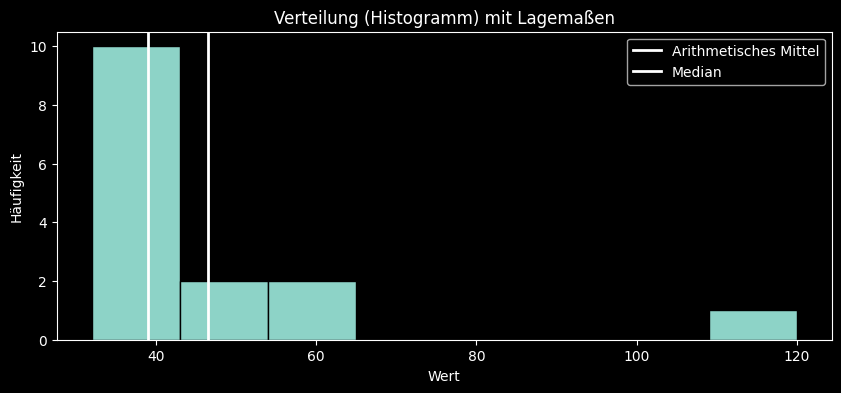

In [12]:
# Visualisierung: Histogramm + Markierungen (Mittelwert, Median)
fig = plt.figure(figsize=(10, 4))
plt.hist(x, bins=8, edgecolor="black")
plt.axvline(arith_m, linewidth=2, label="Arithmetisches Mittel")
plt.axvline(median(x), linewidth=2, label="Median")
plt.title("Verteilung (Histogramm) mit Lagemaßen")
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.legend()
plt.show()

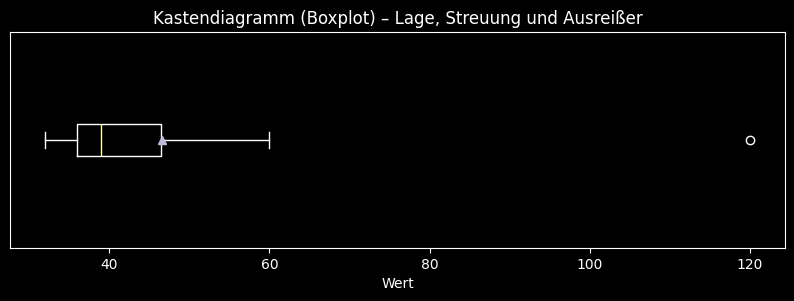

In [13]:
# Visualisierung: Kastendiagramm
fig = plt.figure(figsize=(10, 2.8))
plt.boxplot(x, vert=False, showmeans=True)
plt.title("Kastendiagramm (Boxplot) – Lage, Streuung und Ausreißer")
plt.xlabel("Wert")
plt.yticks([])
plt.show()

## Welche Kennzahl wann?

- **Symmetrische Verteilung:** Arithmetisches Mittel + Standardabweichung oft gut  
- **Schiefe Verteilung:** Median + Interquartilsabstand oft besser  
- **Qualitative Daten:** Modus + Häufigkeiten


## Mini-Beispiel: Interpretation der Schiefe

Wenn das **arithmetische Mittel deutlich größer als der Median** ist, spricht das meist für **Rechtsschiefe**  
(z. B. wenige sehr große Werte). Umgekehrt spricht ein deutlich kleinerer Mittelwert oft für Linksschiefe.


In [14]:
mw = arithmetisches_mittel(x)
med = median(x)

mw, med, mw - med

(46.53333333333333, 39.0, 7.533333333333331)

## Zusammenfassung

- **Lagemaße:** \(\bar{x}\), Median, Modus, Quantile  
- **Streuung:** Spannweite, Varianz/Standardabweichung, Interquartilsabstand  
- **Kastendiagramm:** kombiniert Lage, Streuung und Ausreißer in einer Darstellung
